In [4]:
import pandas as pd

# Load the dataset from a CSV file
boston_data = pd.read_csv('D:/Master Degree at NYCU/1. Slides and Homeworks/Spring_2024/1. FinTech/JN/Boston.csv')

# Display the first few rows of the dataset
print(boston_data.head())


   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2  


Results for Unnamed: 0:
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     100.3
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           1.18e-21
Time:                        12:55:36   Log-Likelihood:                -1760.4
No. Observations:                 506   AIC:                             3525.
Df Residuals:                     504   BIC:                             3533.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4622      0

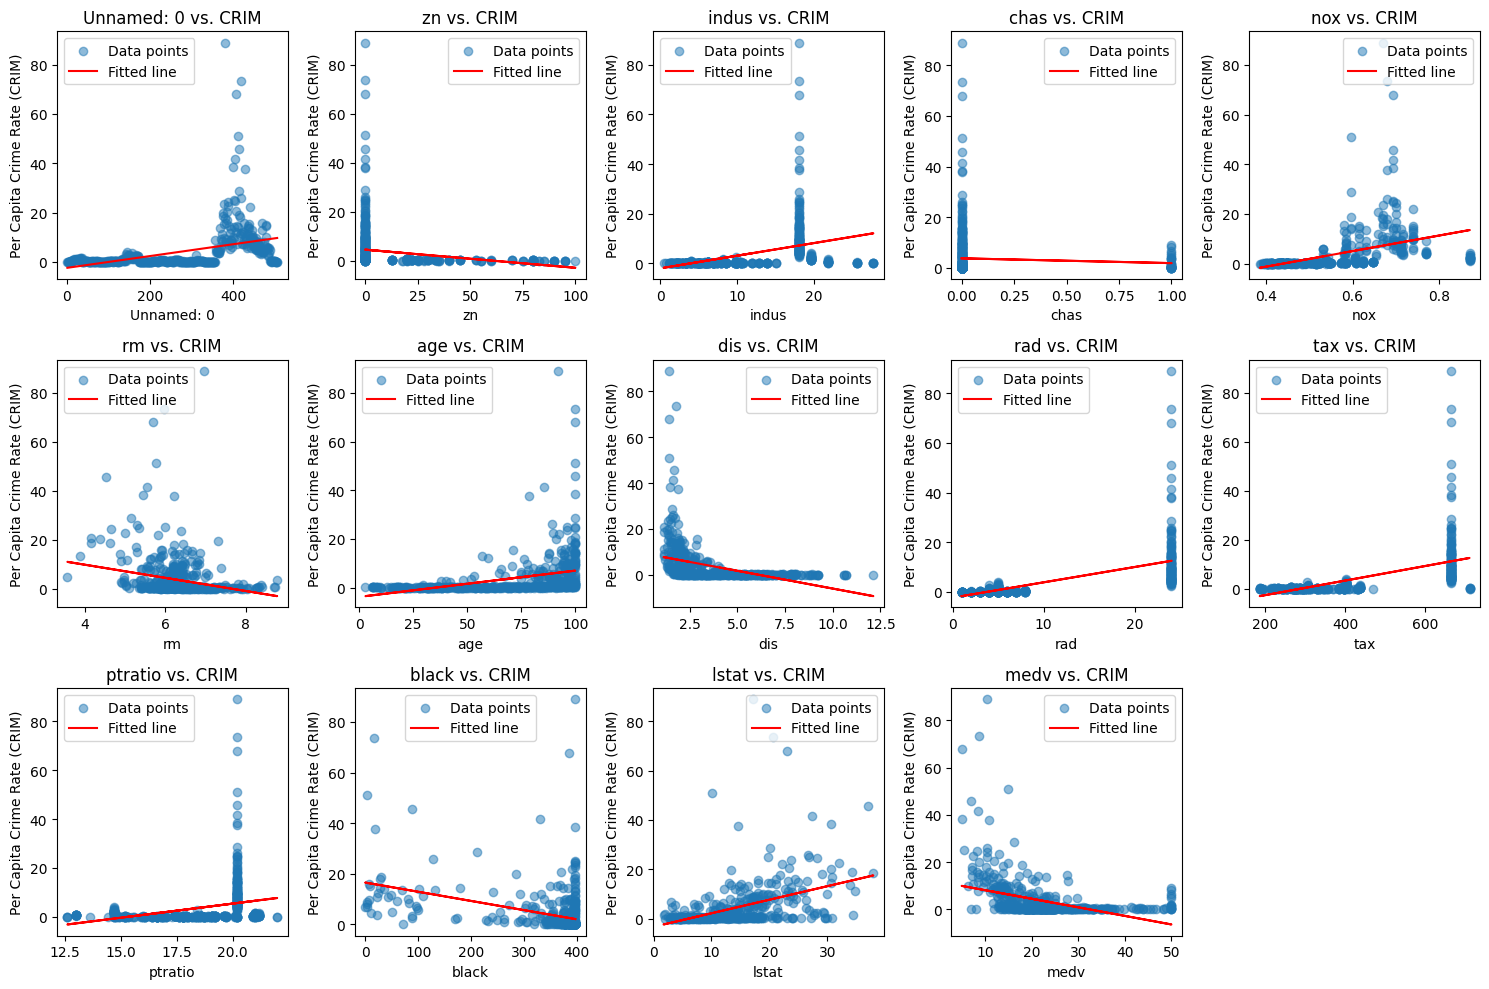

In [8]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Define the response variable
y = boston_data['crim']

# List of predictors (excluding the response variable)
predictors = boston_data.columns.drop('crim')

# Initialize a dictionary to store results
results = {}

# Fit a simple linear regression for each predictor
for predictor in predictors:
    X = sm.add_constant(boston_data[[predictor]])  # Add constant
    model = sm.OLS(y, X).fit()  # Fit the model
    results[predictor] = model  # Store the model results

# Print summaries of each model
for predictor, model in results.items():
    print(f"Results for {predictor}:")
    print(model.summary())
    print("\n")

# Set up a plotting area
plt.figure(figsize=(15, 10))

for i, predictor in enumerate(predictors):
    plt.subplot(3, 5, i + 1)  # 3 rows, 5 columns of plots
    X = sm.add_constant(boston_data[[predictor]])  # Add constant
    plt.scatter(boston_data[predictor], y, alpha=0.5, label='Data points')
    plt.plot(boston_data[predictor], results[predictor].fittedvalues, color='red', label='Fitted line')
    plt.title(f"{predictor} vs. CRIM")
    plt.xlabel(predictor)
    plt.ylabel("Per Capita Crime Rate (CRIM)")
    plt.legend()

plt.tight_layout()
plt.show()


In [13]:
import pandas as pd
import statsmodels.api as sm

# Define the response variable
y = boston_data['crim']

# Define the predictor variables
X = boston_data.drop(columns=['crim'])  # All predictors

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the multiple regression model
multiple_model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(multiple_model.summary())

# Determine which predictors allow us to reject the null hypothesis
alpha = 0.05  # significance level
p_values = multiple_model.pvalues  # p-values for each predictor

# Print the results for each predictor
for predictor, p_value in p_values.items():
    if predictor == 'const':
        continue  # Skip the intercept
    if p_value < alpha:
        print(f"Reject H0: {predictor} has a statistically significant effect on CRIM (p-value = {p_value:.4f})")
    else:
        print(f"Fail to reject H0: {predictor} does not have a statistically significant effect on CRIM (p-value = {p_value:.4f})")

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     29.21
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           7.59e-56
Time:                        13:00:22   Log-Likelihood:                -1653.1
No. Observations:                 506   AIC:                             3336.
Df Residuals:                     491   BIC:                             3400.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0947      7.240      2.361      0.0

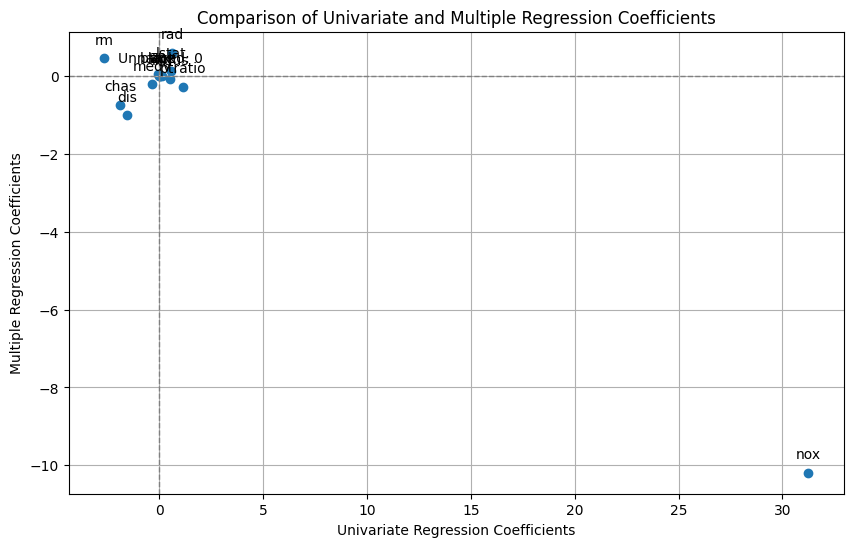

In [16]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define the response variable
y = boston_data['crim']

# Initialize lists to store coefficients and predictors
univariate_coefficients = []
predictors_univariate = []

# Fit univariate regression models for each predictor
for predictor in boston_data.columns:
    if predictor != 'crim':
        X = sm.add_constant(boston_data[[predictor]])  # Add intercept
        univariate_model = sm.OLS(y, X).fit()
        univariate_coefficients.append(univariate_model.params[predictor])
        predictors_univariate.append(predictor)  # Store the predictor name

# Fit the multiple regression model
X_multiple = boston_data.drop(columns=['crim'])
X_multiple = sm.add_constant(X_multiple)
multiple_model = sm.OLS(y, X_multiple).fit()

# Collect the coefficients from the multiple regression model
multiple_coefficients = multiple_model.params[1:]  # Skip the intercept

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(univariate_coefficients, multiple_coefficients)

# Add labels and title
plt.xlabel('Univariate Regression Coefficients')
plt.ylabel('Multiple Regression Coefficients')
plt.title('Comparison of Univariate and Multiple Regression Coefficients')

# Annotate each point with the predictor name
for i, predictor in enumerate(predictors_univariate):
    plt.annotate(predictor, 
                 (univariate_coefficients[i], multiple_coefficients[predictor]),  # Use predictors_univariate to index
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.axhline(0, color='grey', lw=1, ls='--')
plt.axvline(0, color='grey', lw=1, ls='--')
plt.grid()
plt.show()

In [17]:
# Initialize a list to store the results
results = {}

# Loop through each predictor
for predictor in boston_data.columns:
    if predictor != 'CRIM':
        # Create a new DataFrame with the original predictor and its polynomial terms
        X_poly = boston_data[[predictor]].copy()
        X_poly[predictor + '_sq'] = X_poly[predictor] ** 2  # Squared term
        X_poly[predictor + '_cu'] = X_poly[predictor] ** 3  # Cubed term
        
        X_poly = sm.add_constant(X_poly)  # Add intercept
        
        # Fit the polynomial regression model
        polynomial_model = sm.OLS(y, X_poly).fit()
        
        # Store the summary and relevant coefficients
        results[predictor] = polynomial_model.summary()

# Display results for each predictor
for predictor, summary in results.items():
    print(f"Results for {predictor}:")
    print(summary)
    print("\n")

Results for Unnamed: 0:
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     49.67
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           3.98e-28
Time:                        13:06:42   Log-Likelihood:                -1740.6
No. Observations:                 506   AIC:                             3489.
Df Residuals:                     502   BIC:                             3506.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.82